In [2]:
import pip
pip.main(['install','seaborn'])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


0

In [3]:
import numpy as np
import pandas as pd
import pickle

from scipy.spatial.distance import cdist
from mpl_toolkits.mplot3d.axes3d import Axes3D

from sklearn.preprocessing import StandardScaler, RobustScaler

# Кластеризация
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

from sklearn.neighbors import KNeighborsClassifier

# Понижения размерности
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae, mean_squared_error as mse

from sklearn.ensemble import GradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Тема “Обучение без учителя”

**Задание 1**



In [4]:
# Задание 1 
# Импортируйте библиотеки pandas, numpy и matplotlib. 
# Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. 
# Создайте датафреймы X и y из этих данных. Разбейте эти датафреймы на тренировочные (X_train, y_train) 
# и тестовые (X_test, y_test) с помощью функции train_test_split так, 
# чтобы размер тестовой выборки составлял 20% от всех данных, 
# при этом аргумент random_state должен быть равен 42. 
# Масштабируйте данные с помощью StandardScaler. 
# Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42. 
# # Постройте диаграмму рассеяния на этих данных.

In [5]:
from sklearn.datasets import load_boston

In [10]:
boston = load_boston()
data = boston["data"]

data.shape

(506, 13)

In [27]:
feature_names = boston["feature_names"]
X = pd.DataFrame(data, columns=feature_names)
y = boston.target


X.head()
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
scaler = StandardScaler()

In [21]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)

X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

In [28]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

In [29]:
print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


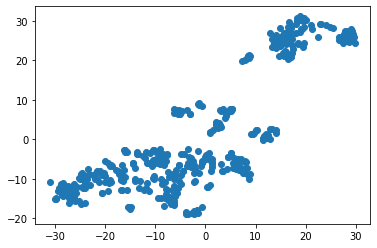

In [30]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

**Задание 2**

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


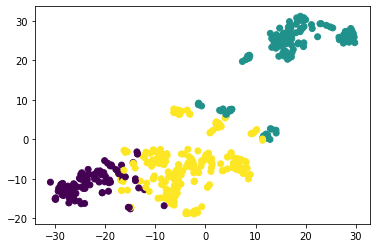

In [33]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

labels_train = kmeans.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

In [35]:
print('Mean price:')
print('Cluster 0: {}'.format(y_train[labels_train == 0].mean()))
print('Cluster 1: {}'.format(y_train[labels_train == 1].mean()))
print('Cluster 2: {}'.format(y_train[labels_train == 2].mean()))
print('Mean CRIM:')
print('Cluster 0: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('Cluster 1: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('Cluster 2: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))

Mean price:
Cluster 0: 27.78837209302326
Cluster 1: 16.165354330708663
Cluster 2: 24.958115183246072
Mean CRIM:
Cluster 0: 0.07356558139534886
Cluster 1: 10.797028425196853
Cluster 2: 0.42166020942408367


**Задание 3**

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


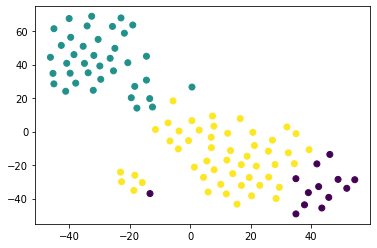

In [37]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

labels_test = kmeans.fit_predict(X_test_scaled)

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_test_tsne = tsne.fit_transform(X_test_scaled)

plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)

plt.show()

In [38]:
print('Mean price:')
print('Cluster 0: {}'.format(y_test[labels_test == 0].mean()))
print('Cluster 1: {}'.format(y_test[labels_test == 1].mean()))
print('Cluster 2: {}'.format(y_test[labels_test == 2].mean()))
print('Mean CRIM:')
print('Cluster 0: {}'.format(X_test.loc[labels_test == 0, 'CRIM'].mean()))
print('Cluster 1: {}'.format(X_test.loc[labels_test == 1, 'CRIM'].mean()))
print('Cluster 2: {}'.format(X_test.loc[labels_test == 2, 'CRIM'].mean()))

Mean price:
Cluster 0: 34.55384615384616
Cluster 1: 16.710526315789473
Cluster 2: 21.71764705882353
Mean CRIM:
Cluster 0: 0.08308461538461537
Cluster 1: 9.419181842105264
Cluster 2: 0.22250117647058823
